# Imports

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from data_extraction.security_info import fetch_metadata
import pandas as pd
import boto3
from dotenv import dotenv_values, find_dotenv
import requests
import io

# Инициализация S3

In [3]:
dot_env_path = find_dotenv()

config = dotenv_values(dot_env_path)

session = boto3.session.Session()
s3 = session.client(
    service_name='s3',
    endpoint_url='https://storage.yandexcloud.net',
    aws_access_key_id = config['AWS_ACCESS_KEY_ID'],
    aws_secret_access_key = config['AWS_SECRET_ACCESS_KEY']
)

## Метаданные

In [34]:
option_secs = ['Si100000BI4D',]
futures_secs = ['SiZ4']

In [36]:
import matplotlib.pyplot as plt

In [49]:
futures_data = pd.DataFrame()
start = 0 
while True:
    response = requests.get(
        'https://iss.moex.com/iss/history/engines/futures/markets/forts/securities/SiZ4.json',
        params={'start': start}
    ).json()['history']
    cols = response['columns']
    data = response['data']
    if len(data) == 0:
        break
    chunk = pd.DataFrame(columns=cols, data=data)
    start += 100
    futures_data = pd.concat([futures_data, chunk], axis=0, ignore_index=True)

futures_data['TRADEDATE'] = pd.to_datetime(futures_data['TRADEDATE'])
futures_data = futures_data.set_index('TRADEDATE')
futures_data

,BOARDID,SECID,OPEN,LOW,HIGH,CLOSE,OPENPOSITIONVALUE,VALUE,VOLUME,OPENPOSITION,SETTLEPRICE,SWAPRATE,WAPRICE,SETTLEPRICEDAY,CHANGE,QTY,NUMTRADES
TRADEDATE,,,,,,,,,,,,,,,,,
2022-12-09,RFUD,SiZ4,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0,71973.0,0.0,NaN,72001.0,NaN,NaN,0
2022-12-12,RFUD,SiZ4,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0,71687.0,0.0,NaN,72453.0,NaN,NaN,0
2022-12-13,RFUD,SiZ4,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0,71680.0,0.0,NaN,72024.0,NaN,NaN,0
2022-12-14,RFUD,SiZ4,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0,72439.0,0.0,NaN,72264.0,NaN,NaN,0
2022-12-15,RFUD,SiZ4,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0,72627.0,0.0,NaN,72688.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13,RFUD,SiZ4,102998.0,102621.0,103934.0,102950.0,2.500084e+11,8.217947e+10,794674.0,2428398,102952.0,0.0,103414.0,103711.0,-0.05,5.0,167651
2024-12-16,RFUD,SiZ4,103000.0,102184.0,103729.0,102940.0,2.335261e+11,7.346332e+10,713102.0,2268874,102926.0,0.0,103024.0,103236.0,-0.01,1.0,186713
2024-12-17,RFUD,SiZ4,102966.0,102244.0,104082.0,104011.0,2.242173e+11,7.212987e+10,699379.0,2156516,103972.0,0.0,103151.0,102916.0,1.04,1.0,155767


<Axes: xlabel='TRADEDATE'>

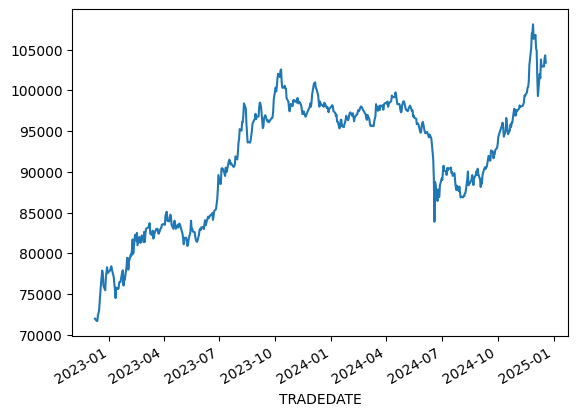

In [50]:
futures_data['SETTLEPRICE'].plot()

In [55]:
put = 'Si82000BU4D'
call = 'Si100000BI4D'

In [56]:
resp = requests.get('https://iss.moex.com/iss/history/engines/futures/markets/options/boards/ROPD/securities/Si100000BI4D.json').json()['history']
cols = resp['columns']
dat = resp['data']
call_df = pd.DataFrame(columns=cols, data=dat)
call_df['TRADEDATE'] = pd.to_datetime(call_df['TRADEDATE'])
call_df = call_df.set_index('TRADEDATE')
call_df

,BOARDID,SECID,OPEN,LOW,HIGH,CLOSE,OPENPOSITIONVALUE,VALUE,VOLUME,OPENPOSITION,SETTLEPRICE,WAPRICE,SETTLEPRICEDAY,CHANGE,QTY,NUMTRADES
TRADEDATE,,,,,,,,,,,,,,,,
2024-09-04,ROPD,Si100000BI4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,0
2024-09-05,ROPD,Si100000BI4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,124.0,NaN,NaN,NaN,NaN,0
2024-09-06,ROPD,Si100000BI4D,100.0,100.0,100.0,100.0,400000.0,200000.0,2.0,4.0,84.0,100.0,86.0,NaN,1.0,2
2024-09-09,ROPD,Si100000BI4D,120.0,120.0,120.0,120.0,11400000.0,5500000.0,55.0,114.0,47.0,120.0,39.0,20.00,1.0,55
2024-09-10,ROPD,Si100000BI4D,75.0,75.0,75.0,75.0,80400000.0,34500000.0,345.0,804.0,68.0,75.0,57.0,-37.50,342.0,2
2024-09-11,ROPD,Si100000BI4D,75.0,75.0,75.0,75.0,81400000.0,500000.0,5.0,814.0,50.0,75.0,76.0,0.00,5.0,1
2024-09-12,ROPD,Si100000BI4D,NaN,NaN,NaN,NaN,81400000.0,NaN,NaN,814.0,30.0,NaN,31.0,NaN,NaN,0
2024-09-13,ROPD,Si100000BI4D,NaN,NaN,NaN,NaN,81400000.0,NaN,NaN,814.0,34.0,NaN,17.0,NaN,NaN,0
2024-09-16,ROPD,Si100000BI4D,NaN,NaN,NaN,NaN,81400000.0,NaN,NaN,814.0,7.0,NaN,11.0,NaN,NaN,0


<Axes: xlabel='TRADEDATE'>

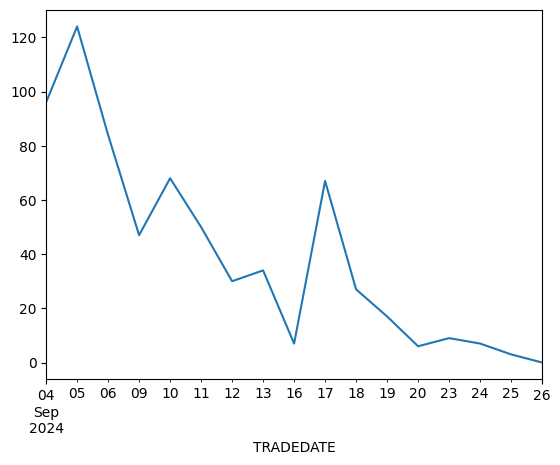

In [57]:
call_df['SETTLEPRICE'].plot()

In [58]:
resp = requests.get(f'https://iss.moex.com/iss/history/engines/futures/markets/options/boards/ROPD/securities/{put}.json').json()['history']
cols = resp['columns']
dat = resp['data']
put_df = pd.DataFrame(columns=cols, data=dat)
put_df['TRADEDATE'] = pd.to_datetime(put_df['TRADEDATE'])
put_df = put_df.set_index('TRADEDATE')
put_df

,BOARDID,SECID,OPEN,LOW,HIGH,CLOSE,OPENPOSITIONVALUE,VALUE,VOLUME,OPENPOSITION,SETTLEPRICE,WAPRICE,SETTLEPRICEDAY,CHANGE,QTY,NUMTRADES
TRADEDATE,,,,,,,,,,,,,,,,
2024-09-04,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,179.0,NaN,NaN,None,NaN,0
2024-09-05,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,73.0,NaN,NaN,None,NaN,0
2024-09-06,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,48.0,NaN,NaN,None,NaN,0
2024-09-09,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,65.0,NaN,NaN,None,NaN,0
2024-09-10,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,64.0,NaN,NaN,None,NaN,0
2024-09-11,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,41.0,NaN,NaN,None,NaN,0
2024-09-12,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,28.0,NaN,NaN,None,NaN,0
2024-09-13,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,32.0,NaN,NaN,None,NaN,0
2024-09-16,ROPD,Si82000BU4D,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,None,NaN,0


<Axes: xlabel='TRADEDATE'>

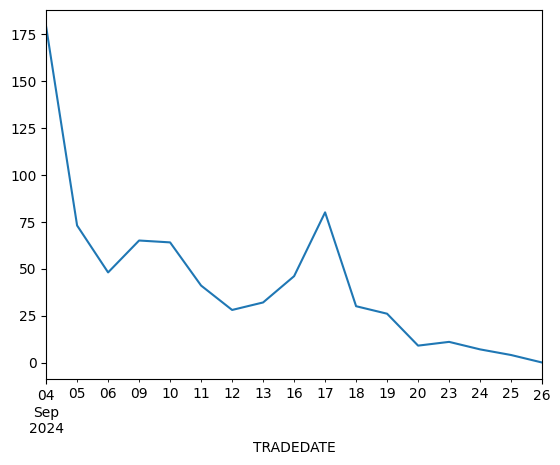

In [59]:
put_df['SETTLEPRICE'].plot()

## Калибровка параметров модели

In [75]:
import pandas as pd, requests, json
from pathlib import Path

OPT_ROOTS = [
    # 6 страйков ±10 % от ATM
    {"STRIKE": 90000,  "CALL": "Si90000BO4D", "PUT": "Si90000BI4D"},
    {"STRIKE": 92000,  "CALL": "Si92000BO4D", "PUT": "Si92000BI4D"},
    {"STRIKE": 94000,  "CALL": "Si94000BO4D", "PUT": "Si94000BI4D"},
    {"STRIKE": 96000,  "CALL": "Si96000BO4D", "PUT": "Si96000BI4D"},
    {"STRIKE": 98000,  "CALL": "Si98000BO4D", "PUT": "Si98000BI4D"},
    {"STRIKE": 100000, "CALL": "Si100000BO4D","PUT": "Si100000BI4D"},
]

options_meta = pd.DataFrame(OPT_ROOTS)
options_meta


,STRIKE,CALL,PUT
0,90000,Si90000BO4D,Si90000BI4D
1,92000,Si92000BO4D,Si92000BI4D
2,94000,Si94000BO4D,Si94000BI4D
3,96000,Si96000BO4D,Si96000BI4D
4,98000,Si98000BO4D,Si98000BI4D
5,100000,Si100000BO4D,Si100000BI4D


In [109]:
def fetch_option_history(secid: str, board: str,
                         date_from="2024-01-01", date_to="2024-12-31") -> pd.DataFrame:
    url = ("https://iss.moex.com/iss/history/engines/futures/markets/"
           f"options/boards/{board}/securities/{secid}.json")

    frames, start = [], 0
    while True:
        js = requests.get(url, params={
            "from": date_from, "till": date_to,
            "start": start, "iss.meta":"off"}).json()
        data = js["history"]["data"]
        if not data:
            break
        frames.append(pd.DataFrame(data, columns=js["history"]["columns"]))
        start += len(data)

    if not frames:
        return pd.DataFrame()

    df = pd.concat(frames, ignore_index=True)
    df["TRADEDATE"] = pd.to_datetime(df["TRADEDATE"])
    return df.set_index("TRADEDATE").sort_index()


### Код калибровки

In [87]:
from scipy.stats import norm
from scipy.optimize import brentq
import numpy as np

RISK_FREE = 0.12     # можно заменить кривой ЦБ

def black76(F, K, T, r, sigma, typ="call"):
    if T <= 0:
        return max(0, (F-K) if typ=="call" else (K-F))
    d1 = (np.log(F/K)+0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    if typ=="call":
        return disc*(F*norm.cdf(d1)-K*norm.cdf(d2))
    else:
        return disc*(K*norm.cdf(-d2)-F*norm.cdf(-d1))

def implied_vol(price, F, K, T, r, typ):
    f = lambda sig: black76(F,K,T,r,sig,typ) - price
    try:
        return brentq(f, 1e-4, 3.0)     # 0.01 % – 300 % годовых
    except ValueError:
        return np.nan


### Калибровка CALL

In [143]:

price_frames = []
for _, row in options_meta.iterrows():
    df = fetch_option_history(row.CALL, 'ROPD')
    df["SECID"] = row.CALL
    price_frames.append(df[["SECID","SETTLEPRICE"]])

prices_all = pd.concat(price_frames)


In [144]:
last_trade_dates = {}

for secs in prices_all['SECID'].unique():
    sample = prices_all[prices_all['SECID'] == secs].sort_index()
    last_trade_dates[secs] = sample.reset_index().iloc[-1]['TRADEDATE']

last_trade_dates

{'Si90000BO4D': Timestamp('2024-03-28 00:00:00'),
 'Si92000BO4D': Timestamp('2024-03-28 00:00:00'),
 'Si94000BO4D': Timestamp('2024-03-28 00:00:00'),
 'Si96000BO4D': Timestamp('2024-03-28 00:00:00'),
 'Si98000BO4D': Timestamp('2024-03-28 00:00:00'),
 'Si100000BO4D': Timestamp('2024-03-28 00:00:00')}

90000 nan
92000 nan
94000 nan
96000 nan
98000 0.5532343822417533
100000 1.0541976663943853


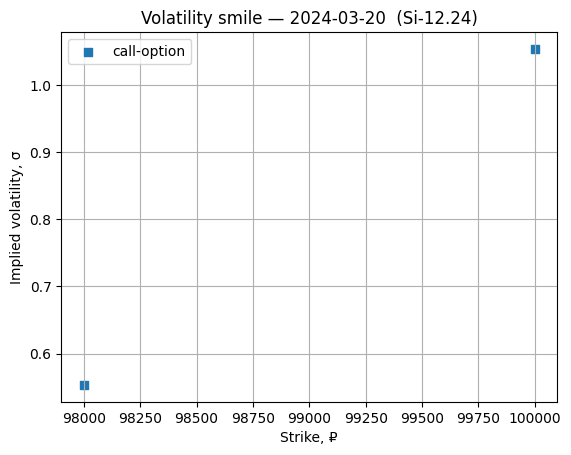

In [159]:
import matplotlib.pyplot as plt

TRADE_DAY = pd.Timestamp('2024-03-20')          
LAST_TRADE = pd.Timestamp('2024-03-28')
# 1. собираем цены опционов & F, T
slice_prices = prices_all.loc[LAST_TRADE]
slice_prices = slice_prices.merge(options_meta[["CALL","STRIKE"]],
                                  left_on="SECID", right_on="CALL", how="left")

F_today = futures_data.loc[TRADE_DAY]
days_to_exp = (LAST_TRADE - TRADE_DAY).days
T = days_to_exp / 365.25


# 2. считаем implied vol
sigma_rows = []
for _, row in slice_prices.iterrows():
    iv = implied_vol(row.SETTLEPRICE, F_today.SETTLEPRICE, row.STRIKE, T,
                     RISK_FREE, 'call')
    print(row.STRIKE, iv)
    sigma_rows.append({"STRIKE": row.STRIKE,
                       "OPTIONTYPE": "call",
                       "IMP_VOL": iv})
sigma_df = pd.DataFrame(sigma_rows)

# 3. строим smile
fig, ax = plt.subplots()
for t, g in sigma_df.groupby("OPTIONTYPE"):
    ax.scatter(g.STRIKE, g.IMP_VOL, marker='o' if t=='C' else 's',
               label=f"{t}-option")
ax.set_xlabel("Strike, ₽")
ax.set_ylabel("Implied volatility, σ")
ax.set_title(f"Volatility smile — {TRADE_DAY.date()}  (Si-12.24)")
ax.legend()
ax.grid(True)
plt.show()


In [60]:
import numpy as np, pandas as pd
from scipy.stats import norm
from scipy.optimize import root_scalar
from datetime import datetime

LOT_SIZE_SI = 1_000        # 1 контракт Si = 1 000 USD
RISK_FREE   = 0.12        # годовая беспроцентная ставка (спот-кривая ЦБ)

def black76(F, K, T, r, sigma, typ='call'):
    if T <= 0:                         # после экспирации
        return max(0, (F-K) if typ=='call' else (K-F))
    d1 = (np.log(F/K) + .5*sigma**2*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    if typ == 'call':
        return disc*(F*norm.cdf(d1) - K*norm.cdf(d2))
    return disc*(K*norm.cdf(-d2) - F*norm.cdf(-d1))

def implied_vol(price, F, K, T, r, typ):
    """Численно обращаем Black-76 → σ."""
    f = lambda s: black76(F, K, T, r, s, typ) - price
    sol = root_scalar(f, bracket=[1e-4, 3.0], method='brentq')
    return sol.root


In [70]:
# выбранный торговый день
trade_dt   = pd.Timestamp('2024-09-10')
last_trade_date = pd.Timestamp('2024-12-19')

# берём строки на date == trade_dt
fut_row  = futures_data.loc[trade_dt]
call_row = call_df.loc[trade_dt]
put_row  = put_df.loc[trade_dt]

F_settle   = fut_row.SETTLEPRICE        # forward-цена Si-фьючерса
K_call     = 100_000   
K_put      = 77_500

T          = (last_trade_date- trade_dt).days / 365.25

# цены опционов (берём SETTLEPRICE — расчётную биржевую)
P_call_mkt = call_row.SETTLEPRICE
P_put_mkt  = put_row.SETTLEPRICE

sigma_call = implied_vol(P_call_mkt, F_settle, K_call, T, RISK_FREE, 'call')
sigma_put  = implied_vol(P_put_mkt,  F_settle, K_put,  T, RISK_FREE, 'put')

sigma = np.mean([sigma_call, sigma_put])   # усреднённая вола на крыльях
print(f"Implied σ_call={sigma_call:.3f}, σ_put={sigma_put:.3f} ➜ σ_bar={sigma:.3f}")


Implied σ_call=0.104, σ_put=0.153 ➜ σ_bar=0.129


In [71]:
P_call_model = black76(F_settle, K_call, T, RISK_FREE, sigma, 'call')
P_put_model  = black76(F_settle, K_put,  T, RISK_FREE, sigma, 'put')

print(f" Call: model={P_call_model:,.1f}  vs  market={P_call_mkt:,.1f}")
print(f"  Put: model={P_put_model:,.1f}  vs  market={P_put_mkt:,.1f}")


 Call: model=192.0  vs  market=68.0
  Put: model=19.3  vs  market=64.0


In [72]:
notional_rub = 1_000_000
qty_call = notional_rub / (K_call * LOT_SIZE_SI)
qty_put  = notional_rub / (K_put  * LOT_SIZE_SI)

print(f"Количество контрактов:  Call {qty_call:.2f}  |  Put {qty_put:.2f}")


Количество контрактов:  Call 0.01  |  Put 0.01
